<a href="https://colab.research.google.com/github/Saptasindhu07/Logistic-Regression/blob/main/Binary_Classification_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
import os
data=pd.read_csv('/content/drive/MyDrive/ML Datasets/sleep_disorder_dataset.csv')
data.head()


,age,sleep_hours,sleep_disorder
0,55.47,7.22,0
1,49.83,6.85,1
2,63.12,5.93,1
3,45.67,7.45,0
4,52.34,6.12,1


<Axes: xlabel='age', ylabel='sleep_hours'>

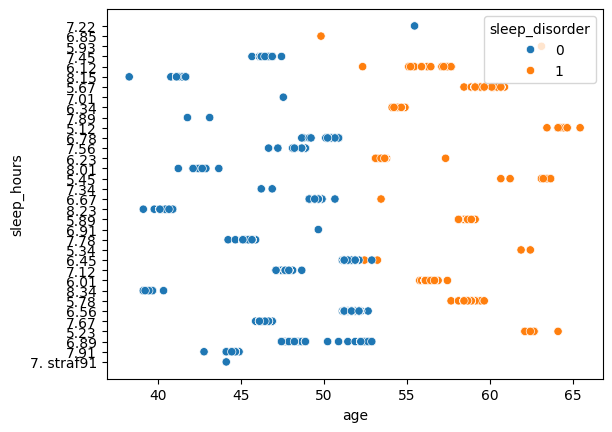

In [ ]:
sns.scatterplot(data=data, x='age',y='sleep_hours', hue='sleep_disorder')

In [ ]:
def removeDecimals(x):
  if x.split(".")[1]=="" or not x.split(".")[1].isnumeric():
    return x.split(".")[0]
  else:
    return x
print(removeDecimals('7. straf91'))


7


In [ ]:
X= data.iloc[:,:-1]
pd.to_numeric(X['age'])
X['sleep_hours']=X['sleep_hours'].apply(removeDecimals)
X['sleep_hours']=X['sleep_hours'].astype(float)
X['sleep_hours']
X.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1616 non-null   float64
 1   sleep_hours  1616 non-null   float64
dtypes: float64(2)
memory usage: 25.4 KB


In [ ]:
y= data.iloc[:,2]
y


,sleep_disorder
0,0
1,1
2,1
3,0
4,1
...,...
1611,1
1612,0
1613,0
1614,1


In [ ]:
 X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25)

# **TIME FOR LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logistic.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.995049504950495


array([[213,   1],
       [  1, 189]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       0.99      0.99      0.99       190

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



# **HYPERPARAMETER TUNING AND MODEL SELECTION**

In [ ]:
penalty=['l1','l2']
cValues=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
params=dict(penalty=penalty,C=cValues,solver=solver)
params

{'penalty': ['l1', 'l2'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
CV= StratifiedKFold()

In [ ]:
grid= GridSearchCV(estimator=logistic,param_grid=params,scoring='recall',cv=CV,n_jobs=-1)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [ ]:
grid.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
grid.best_score_

np.float64(0.9962962962962962)

In [ ]:
y_pred= grid.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[214,   0],
       [  1, 189]])